## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load the Dataset

In [2]:
# class-grades.csv
df = pd.read_csv('class-grades.csv')
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [3]:
df.shape

(99, 6)

## Missing Values

In [4]:
df.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      99 non-null     int64  
 1   Assignment  99 non-null     float64
 2   Tutorial    99 non-null     float64
 3   Midterm     99 non-null     float64
 4   TakeHome    98 non-null     float64
 5   Final       96 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


## Missing Value Imputation

In [6]:
# Import SimpleImputer Function
from sklearn.impute import SimpleImputer

In [7]:
# Create SimpleImputer Object
si = SimpleImputer(strategy='mean')

In [8]:
# get the imputed array output
imputed_array = si.fit_transform(df)
df = pd.DataFrame(imputed_array, columns=df.columns)
df.head()



,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5.0,57.14,34.09,64.38,51.48,52.50
1,8.0,95.05,105.49,67.50,99.07,68.33
2,8.0,83.70,83.17,30.00,63.15,48.89
3,7.0,81.22,96.06,49.38,105.93,80.56
4,8.0,91.32,93.64,95.00,107.41,73.89


In [9]:
df.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

## Outliers

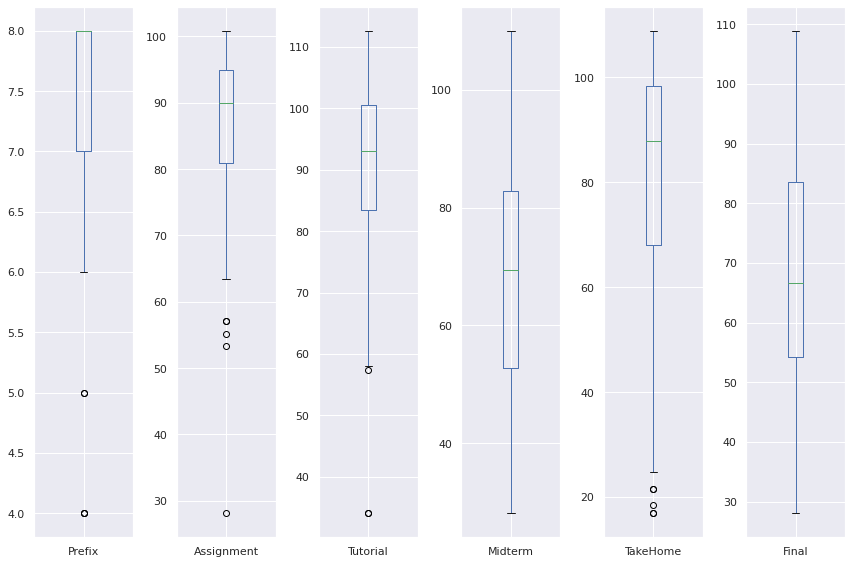

In [10]:
df.plot(kind = 'box', subplots = True, figsize = (12,8), notch=False)
plt.tight_layout();

In [11]:
# Check for outliers the features
def ol_limits(cols):
    q1,q3 = df[cols].quantile([.25, .75])
    IQR = q3 - q1
    UL = q3 + (1.5*IQR)
    LL = q1 - (1.5*IQR)
    return LL, UL


In [12]:
# cap the outliers on the higher end and floor the outliers at the lower end
for columns in df.columns:
    LL,UL = ol_limits(columns)
    df[columns] = np.where(df[columns] < LL, LL, df[columns])
    df[columns] = np.where(df[columns] > UL, UL, df[columns])

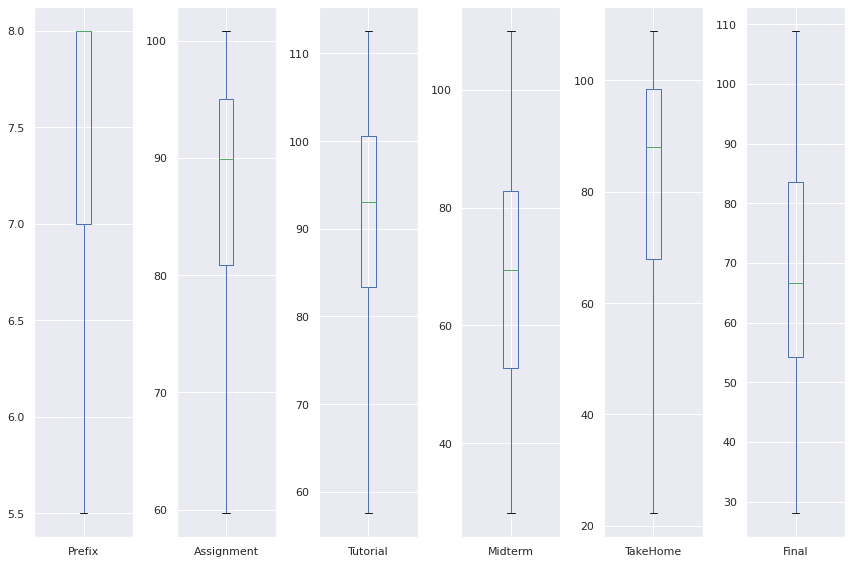

In [13]:
df.plot(kind = 'box', subplots = True, figsize = (12,8), notch=False) #sns.boxplot()
plt.tight_layout();